# Imports

In [20]:
import numpy as np
import os, glob, json
from typing import Tuple, Iterable
from multiprocessing import Pool, Process
import matplotlib.pyplot as plt
import time


# Datenimport

In [2]:
def getJsonFileNamesInFolder(path2jsonFiles: str) -> Iterable[str]:
    res = glob.glob(path2jsonFiles)
    return res

In [3]:
a = getJsonFileNamesInFolder("../data/traintest/*.json")
a[1]

'../data/traintest/1662041197516_to_1662466208815_shape_40000_4_sampleRate_4000_durationInSeconds_10.json'

In [4]:
def parseJsonFile(filename: str) -> dict:
    # start_t = time.perf_counter()
    file = open(filename)
    content = json.load(file)
    file.close()
    # end_t = time.perf_counter()
    return filename, content

In [5]:
def parseJsonFiles(filenames: Iterable[str], processes = None, chunksize=None) -> dict:
    start_t = time.perf_counter()
    parsedJsonFiles: dict = dict()
    with Pool() as pool:
        results = pool.map(parseJsonFile, filenames)

        # for filename, content, duration in results:
        #     print(f"{filename} completed in {duration:.2f}s")
    end_t = time.perf_counter()
    total_duration = end_t - start_t
    print(f"etl took {total_duration:.2f}s total")
    return results

In [6]:
a = np.ones((5, 3))

In [7]:
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [8]:
a[:,0] = [2,2,2,2,2]

In [9]:
a

array([[2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.]])

In [16]:
def createXandY(path2jsonFiles: str) -> Tuple[np.ndarray, np.ndarray]:
    # (filename, dict)
    jsonFilePaths : str = getJsonFileNamesInFolder(path2jsonFiles)
    parsedFilesList = parseJsonFiles(jsonFilePaths)
    numberOfFiles = int(len(parsedFilesList))
    
    sampleRate = int(parsedFilesList[0][1]["sampleRate"])
    durationInSeconds = int(parsedFilesList[0][1]["durationInSeconds"])
    datapointsPerChannel = sampleRate*durationInSeconds
    numberOfChannels = 3

    X = np.empty((numberOfFiles,datapointsPerChannel, numberOfChannels)) # (numberOfFiles, sampleRate*durationInSeconds, numberOfChannels)
    y = np.empty((numberOfFiles,1),dtype=object) #(numberOfFiles, 1)

    for idx, parsedFile in enumerate(parsedFilesList):
        X_temp = np.empty((datapointsPerChannel, numberOfChannels))
        
        X_temp[:,0] = parsedFile[1]["x"]
        X_temp[:,1] = parsedFile[1]["y"]
        X_temp[:,2] = parsedFile[1]["z"]

        X[idx] = X_temp

        y[idx] = parsedFile[1]["label"]




    return X,y 


In [17]:
X, y = createXandY("../data/traintest/*.json")

etl took 12.50s total


In [19]:
print(X.shape, y.shape)

(1987, 40000, 3) (1987, 1)


In [21]:
X[0].shape

(40000, 3)

In [41]:
def getIndicesOfFirstOccurranceOfLabel(searchlabel:str, y):
    labels = np.unique(y)
    if searchlabel not in labels:
        raise Exception("invalid label", "available labels: ", labels)
    indices = []
    for idx, label in enumerate(y):
        if label[0] == searchlabel:
            indices.append(idx)
    return indices

['Gehen']


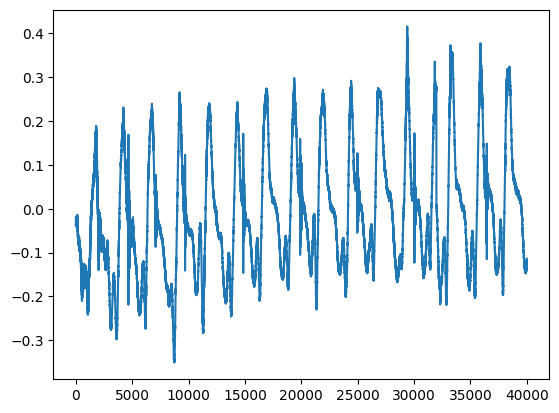

In [47]:

searchLabel = "Gehen"
indices = getIndicesOfFirstOccurranceOfLabel(searchLabel,y)
randomIndex = indices[3]
print(y[randomIndex])
plt.plot(X[randomIndex][:,0])
plt.show()

# Datenvorverarbeitung

# Feature Engineering

# Training

# Evaluierung

# Logging

# Model-Export